In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("fish_data.csv")
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [3]:
df.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [4]:
df.species.unique()

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

In [5]:
# z-transformation

df.length = (df.length - df.length.mean()) / np.sqrt(df.length.std())
df.weight = (df.weight - df.weight.mean()) / np.sqrt(df.weight.std())

In [12]:
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,-2.509449,-0.284196,0.32
1,Anabas testudineus,-3.915345,-0.460670,0.47
2,Anabas testudineus,-3.364234,-0.274392,0.41
3,Anabas testudineus,-3.667908,-0.372433,0.44
4,Anabas testudineus,-2.445715,-0.352825,0.31


In [13]:
from sklearn.preprocessing import LabelEncoder # spatial encoding

encoder = LabelEncoder()
df.species = encoder.fit_transform(df.species)
df.head()

,species,length,weight,w_l_ratio
0,0,-2.509449,-0.284196,0.32
1,0,-3.915345,-0.460670,0.47
2,0,-3.364234,-0.274392,0.41
3,0,-3.667908,-0.372433,0.44
4,0,-2.445715,-0.352825,0.31


In [14]:
lr = LogisticRegression()
train_feats = ["length", "weight", "w_l_ratio"]
lr.fit(df[train_feats], df.species)

LogisticRegression()

In [16]:
print(classification_report(df.species, lr.predict(df[train_feats])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       1.00      1.00      1.00       415
           2       0.70      0.61      0.65       468
           3       0.99      1.00      0.99       435
           4       1.00      1.00      1.00       475
           5       1.00      0.99      1.00       458
           6       1.00      1.00      1.00       418
           7       0.66      0.75      0.71       480
           8       1.00      1.00      1.00       455

    accuracy                           0.92      4080
   macro avg       0.93      0.93      0.93      4080
weighted avg       0.92      0.92      0.92      4080



In [17]:
print(df[df.species == 2].describe())
print(df[df.species == 7].describe())

       species      length      weight   w_l_ratio
count    468.0  468.000000  468.000000  468.000000
mean       2.0    0.448518   -0.530911    0.173013
std        0.0    0.477589    0.069379    0.009995
min        2.0   -0.612425   -0.705772    0.150000
25%        2.0    0.090523   -0.578319    0.170000
50%        2.0    0.366079   -0.539102    0.170000
75%        2.0    0.785036   -0.490082    0.180000
max        2.0    1.723238   -0.303804    0.200000
       species      length      weight   w_l_ratio
count    480.0  480.000000  480.000000  480.000000
mean       7.0    0.171815   -0.625623    0.174437
std        0.0    0.283999    0.110159    0.008842
min        7.0   -0.533695   -0.950874    0.150000
25%        7.0   -0.016325   -0.695968    0.170000
50%        7.0    0.182375   -0.627339    0.170000
75%        7.0    0.378263   -0.558710    0.180000
max        7.0    0.797221   -0.323412    0.200000


In [18]:
lr.coef_

array([[-6.9105525 , -3.36965627,  0.23615739],
       [ 6.38716085, -4.56942716, -0.25684478],
       [ 1.44801236, -2.08000507, -0.19268838],
       [ 3.54149513,  5.34154281,  0.15116435],
       [-4.79484224, 10.59495926,  1.53185776],
       [-2.75786397,  2.62749959, -0.15901146],
       [-3.55330705, -9.65527893, -0.95924521],
       [ 0.39545689, -5.25087522, -0.41438666],
       [ 6.24444053,  6.36124099,  0.06299701]])

<Axes: >

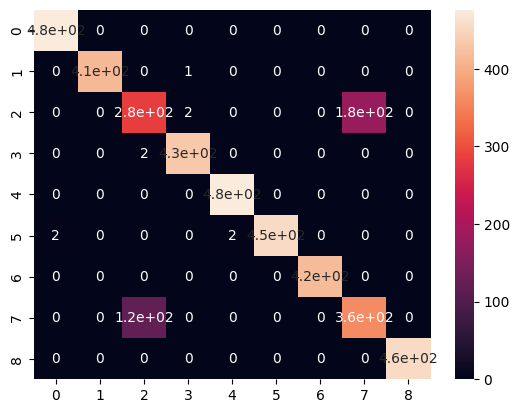

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(df.species, lr.predict(df[train_feats]))
sns.heatmap(cm, annot=True)